<a href="https://colab.research.google.com/github/Manash-Christ/ML-LABS/blob/main/2348528_LAB5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV as lrcv
from sklearn.linear_model import SGDClassifier


from sklearn.model_selection import train_test_split as tts

from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, roc_auc_score, cohen_kappa_score, matthews_corrcoef, f1_score, jaccard_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay
import warnings
warnings.filterwarnings("ignore")

# ML LAB - 5
## LOGISTIC REGRESSION

In [12]:
df=pd.read_csv('MLLAB5.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


##### DATA PRE-PROCESSING

In [13]:
def vif(df):
    viff = {}
    for i in df.drop('Churn',axis=1).columns:
        y = df[i]
        X = df.drop(i, axis=1)
        lr = LinearRegression()
        reg = lr.fit(X, y)
        rs = reg.score(X, y)
        viff[i] = round(1/(1-rs),2)
    return viff

def preprocess(df):
    print("PRE-PROCESSING")
    print("\n")
    print('0. finding index column...')
    for i in df.columns:
        #print(f'{df[i]}')
        if df[i].nunique() == len(df):
            df.set_index(i, inplace=True)
    print(f'Selected index as {df.index.name}')
    print("\n")
    print('1. Looking for Nulls...')
    nul = [cols for cols in df.columns if df[cols].isna().sum() != 0]
    print(f'{df[nul].isna().sum().values.__int__()} Nulls present in {str("".join(nul))}')
    print(f'Data type of {"".join(nul)} is {str(df[nul].dtypes[0])}')
    print(f'Since it is a numeric, continous varible, we can impute the NaNs with the columns mean')
    print('Imputing means....')
    df[nul] = df[nul].fillna(df[nul].mean())
    print("No nulls" if df.columns.isna().sum() == 0 else "Nulls still present")
    print("\n")
    print('2. Looking for categorical variables....')
    cat = [cols for cols in df.columns if str(df[cols].dtypes) == 'object']
    print(f'Categorical variables are: {", ".join(cat)}', end = '.')
    print("\nWe have two ways to encode the categorical variables; LabelEncoder or Dummy Variable.")
    user = int(input("Enter 0 for LabelEncoder and 1 for Dummy Variable."))
    if user == 0:
        print("Label Encoding categorical variables...")
        lb = LabelEncoder()
        for i in cat:
            df[i] = lb.fit_transform(df[i])

    elif user == 1:
        print("Dummy Encoding categorial variables...")
        cat = cat.remove('Churn')
        df['Churn'] = df['Churn'].replace({'Yes':1, 'No':0})
        df = pd.get_dummies(df, drop_first=True, dtype='int')

    print("\n")

    print("3. Normalizing numeric variables...")



    print("4. Variance influencing factor...")
    v = vif(df)
    vf = pd.Series(v).sort_values(ascending=False)
    print(vf)
    print(f"Highly Colinear variables are {' '.join(vf[vf>10].index.to_list())}")
    print("Creating new variable; Monthly Charges as a proportion of Total Charges to remove multicollinearity")
    df['charge_prop'] = df['MonthlyCharges']/df['TotalCharges']
    df.drop(['MonthlyCharges','TotalCharges'],axis=1,inplace=True)
    print("\n")
    print("Re-runing VIF...")
    v = vif(df)
    vf = pd.Series(v).sort_values(ascending=False)
    print(vf)
    print("Using Label encoding produces less linearly dependent result")
    print("Proceed to model development....")
    return df
preprocess(df)

PRE-PROCESSING


0. finding index column...
Selected index as customerID


1. Looking for Nulls...
11 Nulls present in TotalCharges
Data type of TotalCharges is float64
Since it is a numeric, continous varible, we can impute the NaNs with the columns mean
Imputing means....
No nulls


2. Looking for categorical variables....
Categorical variables are: gender, Partner, Dependents, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, Churn.
We have two ways to encode the categorical variables; LabelEncoder or Dummy Variable.
Enter 0 for LabelEncoder and 1 for Dummy Variable.0
Label Encoding categorical variables...


3. Normalizing numeric variables...
4. Variance influencing factor...
TotalCharges        10.45
tenure               7.22
MonthlyCharges       5.14
Contract             2.48
InternetService      1.84
PhoneService         1.63
Partner              1.4

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,charge_prop
customerID,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,0,1.000000
5575-GNVDE,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,0,0.030140
3668-QPYBK,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,1,0.497920
7795-CFOCW,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,0,0.022980
9237-HQITU,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,1,0.466205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,0,0.042602
2234-XADUH,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,0,0.014016
4801-JZAZL,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,0,0.085438


In [7]:
numeric_col = [x for x in df if df[x].nunique() > 10]
cat_col = [x for x in df if df[x].nunique() <= 3]
def plot(df):
    print(f"Categorical columns --> {' '.join(cat_col)}")

plot(df)

Categorical columns --> gender SeniorCitizen Partner Dependents PhoneService MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies Contract PaperlessBilling Churn


##### MODEL BUILDING

In [17]:
#train-test split
def train_test(df,ts):
    X = df.drop('Churn', axis=1)
    y = df['Churn']
    return tts(X,y, test_size=ts)

xtr, xte, ytr, yte = train_test(df,0.2)

In [18]:
#Logistic model with no regularization
y_pred = pd.DataFrame(columns=['Y_true'])
y_pred['Y_true'] = yte


def logistic(df, **kwargs):
    lr = LogisticRegression(penalty=None, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight='balanced',
                    random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
    lr.fit(xtr,ytr)
    yt = lr.predict(xte)
    y_pred['Logistic'] = yt

    cmpr.iloc[0,0] = lr.score(xte,yte)
    cmpr.iloc[0,1] = precision_score(yte, yt)
    cmpr.iloc[0,2] = recall_score(yte, yt)
    cmpr.iloc[0,3] = roc_auc_score(yte, yt)
    cmpr.iloc[0,4] = cohen_kappa_score(yte, yt)
    cmpr.iloc[0,5] = matthews_corrcoef(yte, yt)
    cmpr.iloc[0,7] = f1_score(yte, yt)
    cmpr.iloc[0,6] = jaccard_score(yte, yt)

    return y_pred, cmpr

def logisticCV(df, **kwargs):
    lr = lrcv(cv= 100,penalty='l2', dual=False, tol=0.0001, fit_intercept=True, intercept_scaling=1, class_weight=None,
              random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, n_jobs=None)
    lr.fit(xtr,ytr)
    yt = lr.predict(xte)
    y_pred['LogisticCV'] = yt

    cmpr.iloc[1,0] = lr.score(xte,yte)
    cmpr.iloc[1,1] = precision_score(yte, yt)
    cmpr.iloc[1,2] = recall_score(yte, yt)
    cmpr.iloc[1,3] = roc_auc_score(yte, yt)
    cmpr.iloc[1,4] = cohen_kappa_score(yte, yt)
    cmpr.iloc[1,5] = matthews_corrcoef(yte, yt)
    cmpr.iloc[1,7] = f1_score(yte, yt)
    cmpr.iloc[1,6] = jaccard_score(yte, yt)


def sgd_hinge(df, **kwargs):
    lr = SGDClassifier(loss='hinge',penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True,
                       verbose=0, epsilon=0.1, n_jobs=None, random_state=None, learning_rate='optimal', eta0=0.0, power_t=0.5, early_stopping=False,
                       validation_fraction=0.1, n_iter_no_change=5, class_weight=None, warm_start=False, average=False)
    lr.fit(xtr,ytr)
    yt = lr.predict(xte)
    y_pred['SGD-hinge'] = yt

    cmpr.iloc[2,0] = lr.score(xte,yte)
    cmpr.iloc[2,1] = precision_score(yte, yt)
    cmpr.iloc[2,2] = recall_score(yte, yt)
    cmpr.iloc[2,3] = roc_auc_score(yte, yt)
    cmpr.iloc[2,4] = cohen_kappa_score(yte, yt)
    cmpr.iloc[2,5] = matthews_corrcoef(yte, yt)
    cmpr.iloc[2,7] = f1_score(yte, yt)
    cmpr.iloc[2,6] = jaccard_score(yte, yt)

def sgd_log_loss(df, **kwargs):
    lr = SGDClassifier(loss='log_loss',penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True,
                       verbose=0, epsilon=0.1, n_jobs=None, random_state=None, learning_rate='optimal', eta0=0.0, power_t=0.5, early_stopping=False,
                       validation_fraction=0.1, n_iter_no_change=5, class_weight=None, warm_start=False, average=False)
    lr.fit(xtr,ytr)
    yt = lr.predict(xte)
    y_pred['SGD-log_loss'] = yt

    cmpr.iloc[3,0] = lr.score(xte,yte)
    cmpr.iloc[3,1] = precision_score(yte, yt)
    cmpr.iloc[3,2] = recall_score(yte, yt)
    cmpr.iloc[3,3] = roc_auc_score(yte, yt)
    cmpr.iloc[3,4] = cohen_kappa_score(yte, yt)
    cmpr.iloc[3,5] = matthews_corrcoef(yte, yt)
    cmpr.iloc[3,7] = f1_score(yte, yt)
    cmpr.iloc[3,6] = jaccard_score(yte, yt)

cmpr = pd.DataFrame(columns = ['Accuracy', 'Precision', 'Recall', 'AUC', 'C-kappa', 'Matthew', 'jaccard', 'f1_score'],
                    index = ['Logistic', 'LogisticCV', 'SGD-log_loss', 'SGD-hinge'] )
stay = True
while stay:

    user = input("Enter the model that needs to be tested: ('log' for logistic regression, \
    'logc' for logistic regression with cross validation, 'sgd_hinge' for stochastic gradient descent with hinge loss, \
    'sgd_log_loss' for stochastic gradient descent with log loss (or) 'exit' to end.")
    if str(user) == 'log':
        print('Logistic Regression')
        logistic(df)

    elif str(user) == 'logc':
        print('Logistic Cross-Validated Regression')
        logisticCV(df)

    elif str(user) == 'sgd_hinge':
        print('Stochastic Gradient Descent with hinge loss')
        sgd_hinge(df)

    elif str(user) == 'sgd_log_loss':
        print('Stochastic Gradient Descent with Log Loss')
        sgd_log_loss(df)


    elif str(user).lower() == 'exit':
        stay = False





Enter the model that needs to be tested: ('log' for logistic regression,     'logc' for logistic regression with cross validation, 'sgd_hinge' for stochastic gradient descent with hinge loss,     'sgd_log_loss' for stochastic gradient descent with log loss (or) 'exit' to end.log
Logistic Regression
Enter the model that needs to be tested: ('log' for logistic regression,     'logc' for logistic regression with cross validation, 'sgd_hinge' for stochastic gradient descent with hinge loss,     'sgd_log_loss' for stochastic gradient descent with log loss (or) 'exit' to end.logc
Logistic Cross-Validated Regression
Enter the model that needs to be tested: ('log' for logistic regression,     'logc' for logistic regression with cross validation, 'sgd_hinge' for stochastic gradient descent with hinge loss,     'sgd_log_loss' for stochastic gradient descent with log loss (or) 'exit' to end.sgd_hinge
Stochastic Gradient Descent with hinge loss
Enter the model that needs to be tested: ('log' for l

In [19]:
cmpr

,Accuracy,Precision,Recall,AUC,C-kappa,Matthew,jaccard,f1_score
Logistic,0.735983,0.493506,0.835165,0.7683,0.437834,0.473514,0.449704,0.620408
LogisticCV,0.803407,0.65371,0.508242,0.707231,0.446863,0.452826,0.400433,0.57187
SGD-log_loss,0.801278,0.673554,0.447802,0.686102,0.417836,0.431963,0.367946,0.537954
SGD-hinge,0.799858,0.618497,0.587912,0.730798,0.469156,0.469425,0.431452,0.602817


In [20]:
for i in y_pred.columns:
    print(y_pred[i].value_counts())

0    1045
1     364
Name: Y_true, dtype: int64
0    793
1    616
Name: Logistic, dtype: int64
0    1126
1     283
Name: LogisticCV, dtype: int64
0    1167
1     242
Name: SGD-hinge, dtype: int64
0    1063
1     346
Name: SGD-log_loss, dtype: int64


In [22]:
confusion_matrix(y_pred['Y_true'],y_pred['Logistic'])

array([[733, 312],
       [ 60, 304]])

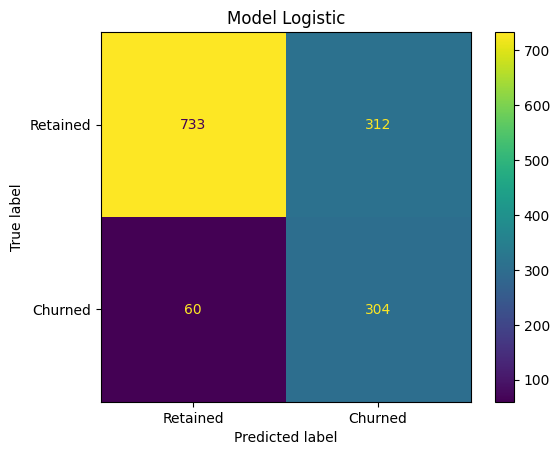

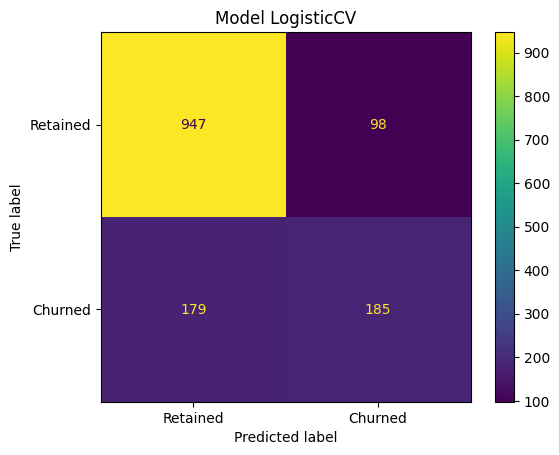

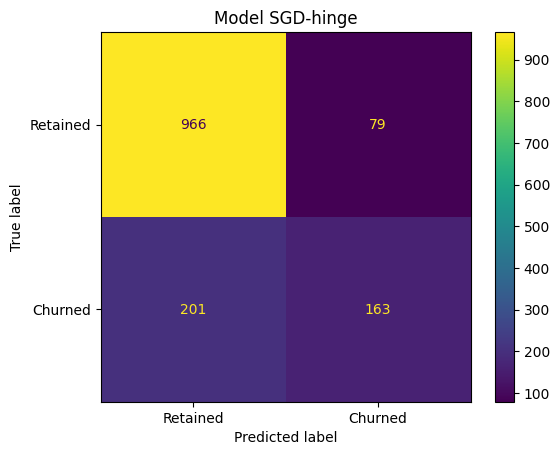

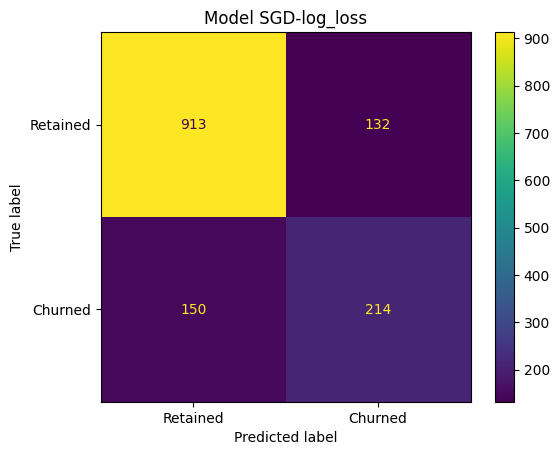

In [23]:
for i in y_pred.drop('Y_true',axis=1):
    ConfusionMatrixDisplay(confusion_matrix(y_pred['Y_true'],y_pred[i]),display_labels=['Retained','Churned']).plot();plt.title(f'Model {i}')


In [24]:
y_pred

,Y_true,Logistic,LogisticCV,SGD-hinge,SGD-log_loss
customerID,,,,,
7909-FIOIY,0,1,0,0,0
3948-KXDUF,0,0,0,0,0
0334-GDDSO,1,1,1,1,1
3280-MRDOF,0,0,0,0,0
5248-YGIJN,0,0,0,0,0
...,...,...,...,...,...
3642-BYHDO,0,0,0,0,0
5046-NUHWD,0,1,0,0,1
5590-BYNII,1,1,0,0,1


**from scratch**

In [25]:
losss = []
class LogReg:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose

    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)

    #SIGMOID FUNCTION
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    #LOG LOSS
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

    #FIT METHOD
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)

        # weights initialization
        self.theta = np.zeros(X.shape[1])

        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient

            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            loss = self.__loss(h, y)

            if(self.verbose ==True and i % 10000 == 0):
                global losss
                losss.append(loss)
                print(f'loss: {loss} \t')

    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)

        return self.__sigmoid(np.dot(X, self.theta))

    def predict(self, X):
        return self.predict_prob(X).round()

In [26]:
model = LogReg(lr=0.01, num_iter=100000, fit_intercept=True, verbose=True)

model.fit(df.drop('Churn', axis=1),df['Churn'])


loss: 0.7199201493785828 	
loss: 0.428701678997185 	
loss: 0.42713512677819127 	
loss: 0.4266262526491083 	
loss: 0.42642809093466777 	
loss: 0.42634456980781954 	
loss: 0.4263081732386664 	
loss: 0.42629208627450726 	
loss: 0.42628493032664333 	


KeyboardInterrupt: ignored

In [38]:
model_new = LogisticRegression(penalty=None, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None,
                    random_state=None, solver='saga', max_iter=10000, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
model_new.fit(xtr,ytr)
model_new.score(xte,yte)

0.8041163946061036

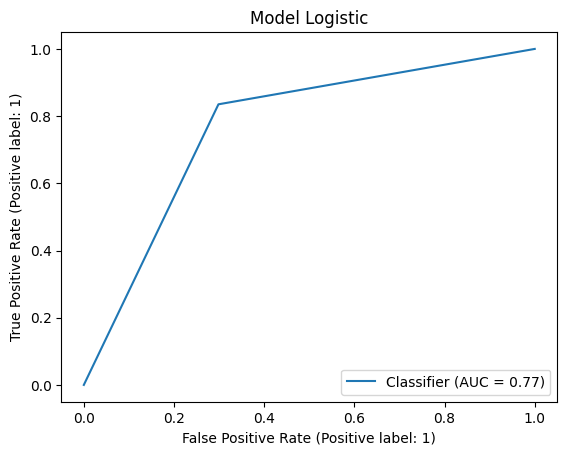

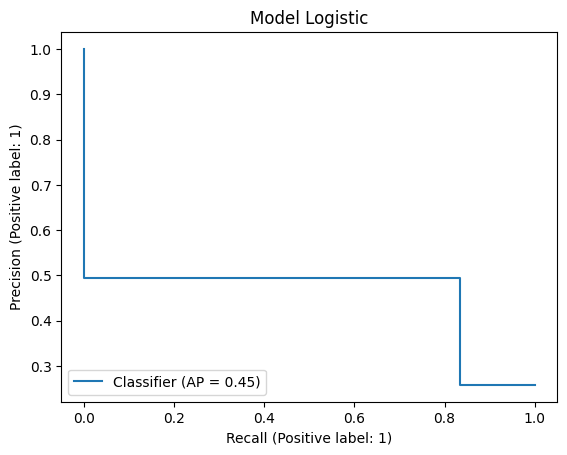

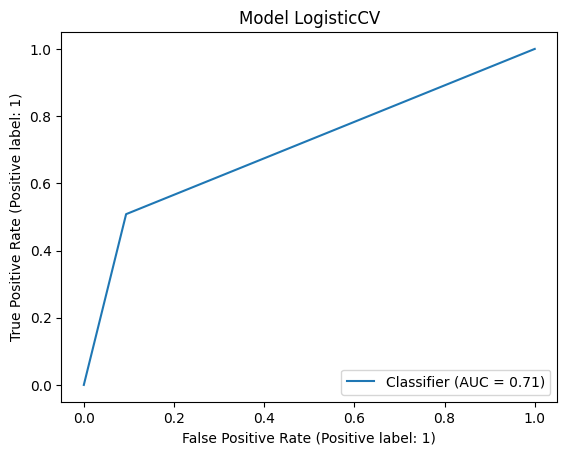

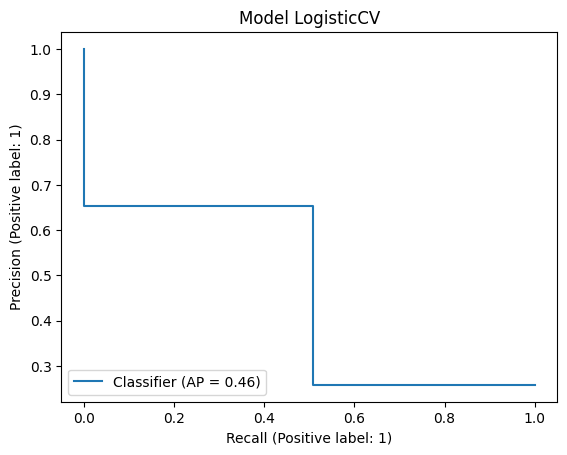

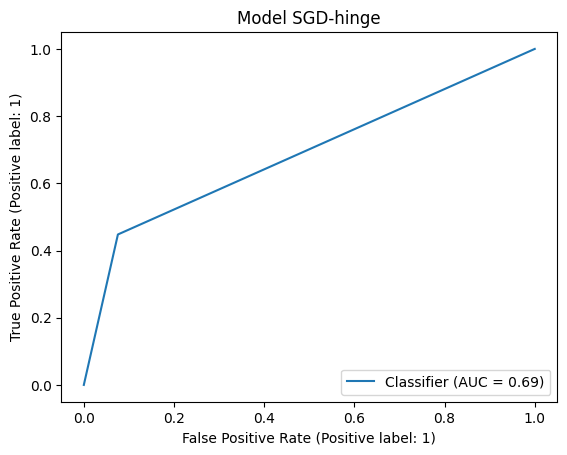

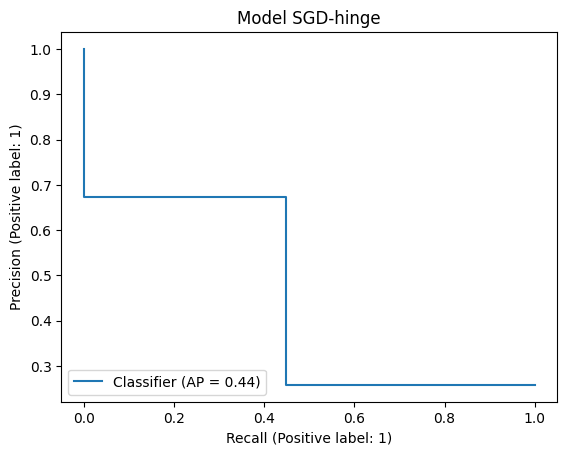

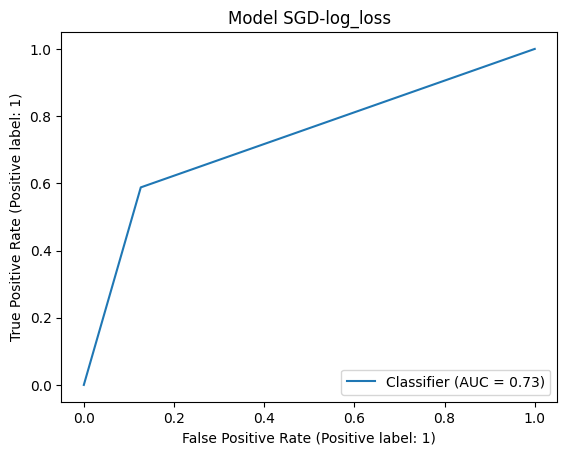

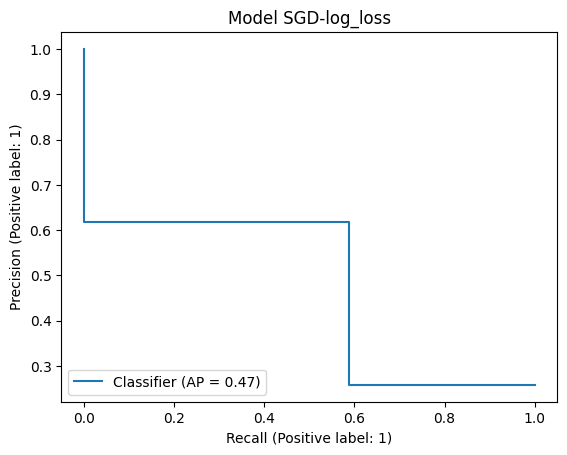

In [35]:
for i in y_pred.iloc[:,1:].columns:
  RocCurveDisplay.from_predictions(y_pred['Y_true'],y_pred[i])
  plt.title(f"Model {i}")
  PrecisionRecallDisplay.from_predictions(y_pred['Y_true'], y_pred[i])
  plt.title(f"Model {i}")
  plt.show()

**SIGMOID CURVE**

In [47]:
model_new.predict_proba(xte)

array([[0.6138119 , 0.3861881 ],
       [0.99187132, 0.00812868],
       [0.31523625, 0.68476375],
       ...,
       [0.51725269, 0.48274731],
       [0.58865538, 0.41134462],
       [0.81300489, 0.18699511]])